In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

import info_measures.numpy.kraskov_stoegbauer_grassberger as ksg

In [18]:
variance = 1.
rho = .6
n_samples = 10000

In [19]:
e_ts = []
e_2ts = []
pis = []
e_pis = []
dims = np.linspace(1, 20, 15, dtype=int)[::-1]
dim = dims[0]
sigma_2t = np.ones((2*dim, 2*dim)) * variance * rho
sigma_2t[np.arange(2*dim), np.arange(2*dim)] = variance
mean_2t = np.zeros(2*dim)
samples = np.random.multivariate_normal(mean_2t, sigma_2t, size=n_samples)
samples_x = samples[:, :dim]
samples_y = samples[:, dim:]


for dim in dims:
    sxi = samples_x[:, :dim]
    syi = samples_y[:, :dim]
    sigma_t = np.ones((dim, dim)) * variance * rho
    sigma_t[np.arange(dim), np.arange(dim)] = variance
    mean_t = np.zeros(dim)

    sigma_2t = np.ones((2*dim, 2*dim)) * variance * rho
    sigma_2t[np.arange(2*dim), np.arange(2*dim)] = variance
    mean_2t = np.zeros(2*dim)

    e_t = multivariate_normal(mean_t, sigma_t).entropy()
    e_2t = multivariate_normal(mean_2t, sigma_2t).entropy()
    e_ts.append(e_t)
    e_2ts.append(e_2t)
    pis.append(2*e_t - e_2t)
    e_pis.append(ksg.MutualInformation(sxi, syi).mutual_information())

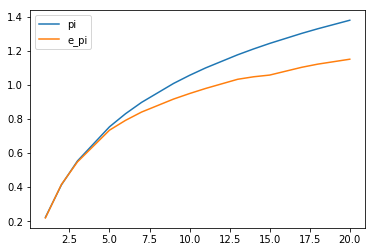

In [20]:
#plt.plot(dims, e_ts / dims, label='e_t')
#plt.plot(dims, e_2ts / dims, label='e_2t')
plt.plot(dims, pis, label='pi')
plt.plot(dims, e_pis, label='e_pi')
plt.legend()
plt.show()

In [60]:
dim = 6
variance = .64
rho = .6
sigma_t = np.ones((dim, dim)) * variance * rho
sigma_t[np.arange(dim), np.arange(dim)] = variance

In [61]:
variance*(1.+(dim-1)*rho), np.linalg.eigvalsh(sigma_t)

(2.56, array([ 0.256,  0.256,  0.256,  0.256,  0.256,  2.56 ]))

In [62]:
sigma_t

array([[ 0.64 ,  0.384,  0.384,  0.384,  0.384,  0.384],
       [ 0.384,  0.64 ,  0.384,  0.384,  0.384,  0.384],
       [ 0.384,  0.384,  0.64 ,  0.384,  0.384,  0.384],
       [ 0.384,  0.384,  0.384,  0.64 ,  0.384,  0.384],
       [ 0.384,  0.384,  0.384,  0.384,  0.64 ,  0.384],
       [ 0.384,  0.384,  0.384,  0.384,  0.384,  0.64 ]])

In [63]:
L = np.linalg.cholesky(sigma_t)
print(L)

[[ 0.8         0.          0.          0.          0.          0.        ]
 [ 0.48        0.64        0.          0.          0.          0.        ]
 [ 0.48        0.24        0.59329588  0.          0.          0.        ]
 [ 0.48        0.24        0.16180797  0.57080485  0.          0.        ]
 [ 0.48        0.24        0.16180797  0.12231533  0.55754564  0.        ]
 [ 0.48        0.24        0.16180797  0.12231533  0.09839041  0.54879547]]


In [64]:
print(L.T)

[[ 0.8         0.48        0.48        0.48        0.48        0.48      ]
 [ 0.          0.64        0.24        0.24        0.24        0.24      ]
 [ 0.          0.          0.59329588  0.16180797  0.16180797  0.16180797]
 [ 0.          0.          0.          0.57080485  0.12231533  0.12231533]
 [ 0.          0.          0.          0.          0.55754564  0.09839041]
 [ 0.          0.          0.          0.          0.          0.54879547]]


In [29]:
L.dot(L.T)

array([[ 1. ,  0.6,  0.6,  0.6],
       [ 0.6,  1. ,  0.6,  0.6],
       [ 0.6,  0.6,  1. ,  0.6],
       [ 0.6,  0.6,  0.6,  1. ]])

In [58]:
np.square(L[1]).sum()

1.0